![HolyChurninityLogo](Trinity-overlay-overlay-overlay.jpg)

![HolyChurninityLogo2](ProfLOGO.png)

# Swan Teleco _Churn Prediction and Risk Management_

## Summary

The aims of this project are find key predictors in _Swan Teleco's_ customer churn to implement business decisions for the Customer Retention Marketing team.

Our objective aims are to:
- Find customers most at risk to churning
- Identify key data points that indicate a customers risk of churning, deducing factors to incentivise
- Quantify the churn risk for all remaining customers

**NOTE** This notebook must be run in Google Colab.

## Exploratory Data Analysis

In [ ]:
# Install required package
!pip install ydf
!pip install openpyxl

In [ ]:
# Load in necessary packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import ydf

In [ ]:
# Read in customer retention dataframe
raw_data = pd.read_excel('1 - Project Data.xlsx')

In [ ]:
# Observe first five rows of the dataframe
raw_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [ ]:
# Check for dataframe size and data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
# Observe ranges of numerical data
raw_data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


In [ ]:
# Check for nulls
raw_data.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
# Check for locations of missing values
len(raw_data.loc[(raw_data['Churn Value'] == 0) & raw_data['Churn Reason'].isna()])

5174

In [ ]:
# Check for missing values in Total Charges
print(len(raw_data[raw_data['Total Charges'] == np.nan]))

print(len(raw_data[raw_data['Total Charges'] == '']))

print(len(raw_data[raw_data['Total Charges'] == ' '])) #Missing values are filled in TotalChargesEst function

0
0
11


In [ ]:
# Check for duplicate data
raw_data.duplicated().sum()

np.int64(0)

In [ ]:
# Number of unique customer IDs
raw_data.CustomerID.nunique()

7043

### Notes
* The dataframe consists of 7043 entries and 31 columns.
* There are a variety of data types. Many are objects, which will need to be handled before modelling.
* There are 5174 null values in `Churn Reason`. This accounts for **73%** of entries for this feature.
* We observe that these missing values occur for entries in which `Churn Value` is equal to **0**. There can be no reason provided for churning if the churning has not taken place.
* We also observe missing values for `Total Charges`. There are 11 missing entries, denoted by ' '. Calculations involving the product of `Monthly Charges` and `Tenure Months` reveal that this product is a relatively accurate and suitable filler for these missing entries.
* There is no duplicate data.
* All `CustomerID` entries are unique.

## Feature Engineering
### Data Cleaning

In [ ]:
def TotalChargesEst(df):
    '''
    This function estimates the total charges from missing data.
    We considered adding a randomised error utilising the difference in modelled data to real data, however for only filling 11 values, we don't see a significant difference being made.
    Further to this the distribution of errors in our model and real values was somewhat geometric about 0 errors so on average we wouldn't expect this to make a difference.
    '''
    # Replace empty entries with 'nan'
    df['total_charges'] = pd.to_numeric(df['total_charges'].replace(' ', np.nan), errors='coerce')

    # Index dataframe by 'nan' values
    changed_indices = df[df['total_charges'].isna()].index

    # Replace 'nan' values with estimated calculation
    calculated_total = df['monthly_charges']*df['tenure_months']

    # Put estimated values back into full dataframe
    df['total_charges'] = df['total_charges'].fillna(calculated_total)

    return df, changed_indices

In [ ]:
def BoolMapping(df, cols):
    '''
    This function maps all columns in cols to a boolean data type.
    Noteably, 'Churn Value' is not transferred to boolean for ease after modelling.
    '''
    # Loop over input list to identify 'Yes/No' features against 'Male/Female' feature
    for col in cols:
        if col in ['senior_citizen', 'partner', 'dependents', 'phone_service', 'paperless_billing']:
            df[col] = df[col].map({'Yes': 1, 'No': 0})
        if col == 'gender':
            df['is_male'] = df[col].map({'Male': 1, 'Female': 0})
            df.drop(columns = 'gender', inplace=True)
            cols = ['is_male' if c == 'gender' else c for c in cols]
    return df, cols

In [ ]:
def Cleaning(rawdf, catcol, boolcol, stringcol, floatcol,
             dropcol):
    '''
    This function aims to clean all data as apart of the data pipeline, to prepare for modelling.
    Key points this function targets:
    -Normalising Column names
    -Fill any missing Data
    -Change types of columns
    -Drop any columns
    -Return a numeric and bool dataframe
    '''

    df = rawdf.copy()

    # Column names to be lowercase with no spaces
    df.columns = df.columns.str.strip().str.replace(' ',  '_').str.lower()

    # Replace missing values in 'churn_reason' feature with a string
    df, est_indicies = TotalChargesEst(df)
    df['churn_reason'].fillna('No Reason', inplace=True)

    # Change data types
    df[catcol] = df[catcol].astype('category')
    #Bools
    df, boolcol_altered = BoolMapping(df, cols = boolcol)
    df[boolcol_altered] = df[boolcol_altered].astype('bool')
    df[stringcol] = df[stringcol].astype('string')
    df[floatcol] = df[floatcol].astype('float')

    # Drop columns
    df.drop(columns=dropcol, inplace=True)

    # Return numeric dataframe for visualisation
    dfnumeric = df.copy()
    dfnumeric[boolcol_altered] = df[boolcol_altered].astype('int')

    return df, dfnumeric

In [ ]:
# Columns specifying which datatype needed to be changed
CatCol = ['city', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'contract', 'paperless_billing', 'payment_method', 'churn_reason']
BoolCol = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'paperless_billing']
StringCol = ['customerid']
FloatCol = ['total_charges']
DropCol = ['country', 'count', 'churn_label', 'lat_long', 'state', 'churn_reason', 'city', 'latitude', 'longitude']

In [ ]:
# Apply cleaning function to raw dataframe
cleandf, cleannumericdf = Cleaning(raw_data, catcol=CatCol, boolcol=BoolCol, stringcol=StringCol, floatcol=FloatCol, dropcol=DropCol)

/tmp/ipython-input-12-3224232830.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['total_charges'] = pd.to_numeric(df['total_charges'].replace(' ', np.nan), errors='coerce')
/tmp/ipython-input-14-78858696.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['churn_reason'].fillna('No Reason

### Notes
* A function was created to estimate the total charges from missing data. We considered adding a randomised error utilising the difference in modelled data to real data. However only filling 11 values were missing, which was not deemed a significant proportion, and so such a complex function felt unnecessary. Further to this the distribution of errors in our model and real values was somewhat geometric about 0 errors, so on average we would not expect this to make a difference.
* We identified features with potential boolean data types, being of a 'Yes or No' or 'Male or Female' format. These were mapped to a 'True or False' boolean data type for ease in visualising.
* A full cleaning function was prepared to combine all seperate steps:
  * Normalising column names to be lowercase with no spaces
  * Handle missing values
  * Change data types
  * Drop any unnecessary columns
  * Return both numeric and boolean dataframes.
* We applied this function to the dataframe to return two types of clean dataframe, numeric and boolean. These were both used in modelling to achieve maximal results.

### Engineering and Splitting

In [ ]:
def bucketise(df :pd.DataFrame, feature :str, bins :list) -> pd.DataFrame:
    '''
    Function to bucketise continuous numerical features, for use in classification.
    '''
    df = df.copy()
    labels = [i for i in range(1, len(bins))]
    df[f'{feature}_bucketed'] = pd.cut(df[feature], bins, labels=labels)
    return df

In [ ]:
def feature_eng(input_df):
    '''
    Function to apply all feature engineering functions.
    Outcome dataframes are ready for modelling.
    '''
    df = input_df.copy()

    # Bucketising
    df = bucketise(df, 'total_charges', [x for x in range(0, 9000, 500)])
    df = bucketise(df, 'monthly_charges', [x for x in range(0, 130, 20)])
    df.drop(['monthly_charges', 'total_charges'], axis=1, inplace=True)

    # Setting id as index
    df.set_index('customerid', inplace=True)

    # Truncate 'zip_code' to first three digits
    # Generalises data so that there are less unique categories
    df['truncated_zip'] = df['zip_code'].astype(str).str[:3].astype(int)
    df.drop(['zip_code'], axis = 1, inplace = True)

    # Split dataframe into features and target
    Xdata = df.drop(columns = 'churn_value')
    ydata = df['churn_value']

    return Xdata, ydata

In [ ]:
# Apply feature engineering to cleaned dataframe
X, y = feature_eng(cleandf)

In [ ]:
# Apply train-test splitting to data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [ ]:
# Check for correct splitting
X_train.head()

,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,is_male,total_charges_bucketed,monthly_charges_bucketed,truncated_zip
customerid,,,,,,,,,,,,,,,,,,,,
4950-BDEUX,False,False,False,35,False,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,False,Electronic check,True,4,3,923
7993-NQLJE,False,True,True,15,True,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,False,Mailed check,True,3,4,959
7321-ZNSLA,False,True,True,13,False,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,False,Mailed check,True,2,3,960
4922-CVPDX,False,True,False,26,True,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,True,Credit card (automatic),False,4,4,926
2903-YYTBW,False,True,True,1,True,No,DSL,No,No,No,No,No,No,Month-to-month,False,Electronic check,True,1,3,925


### Notes
* We identified two features, `total_charges` and `monthly_charges`, which were continuous numerical data types. Continuous data can overcomplicate decision trees, which was the method with which we had decided to model. Because of this, a function was written to bucketise these features.
* The feature `zip_code`, although numerical, represents geographical location. In this dataframe there were **1652** unique zip code values. We wanted to categorise this for use in modelling, however this was deemed to be too many categories. Upon further research, we identified that the first three digits of the zipcode could be sufficient geographical identifiers.
* A full feature engineering function performed the following:
  * Bucketise continuous numerical features
  * Set `customerid` as the dataframe index
  * Truncate `zip_code` to first three digits
  * Split data by features and target variable `churn_value`
* The feature engineering function was applied to be cleaned boolean dataframe, and this then split into train and test sets using a test size of 0.2 and random state 42.

## YDF Modelling (Finding Optimal HyperParameters)

In [ ]:
ydfmodel = ydf.RandomForestLearner(label='churn_value', max_depth=5, winner_take_all=False)

# Copy train and test dataframes
X_train_ydf = X_train.copy()
X_test_ydf = X_test.copy()

# Add target back to X_train and X_test
X_train_ydf['churn_value'] = y_train
X_test_ydf['churn_value'] = y_test

In [ ]:
# Train YDF model on train set
ydfmodeltrained = ydfmodel.train(X_train_ydf)

Train model on 5634 examples
Model trained in 0:00:01.140014


In [ ]:
# Fit model on train data
ydfmodeltrained.evaluate(X_train_ydf)

Label \ Pred,0,1
0,3852,287
1,816,679


In [ ]:
# Fit model on test data
ydfmodeltrained.evaluate(X_test_ydf)

Label \ Pred,0,1
0,961,74
1,206,168


In [ ]:
# Visualise YDF model decision tree
ydfmodeltrained.plot_tree()

In [ ]:
# Model summary statistics
ydfmodeltrained.describe()

### Notes
* A random forest with maximum depth 5 was trained on the training set using the YDF library. YDF does not require any specific data types, and as such is the easiest to implement for a dataframe such as this.
* This model was then fitted and evaluated on the train and test data. An accuracy of **0.804** was achieved on the train set and **0.801** for the test set. These accuracies are very similar, suggesting minimal under or overfitting to the train data. This gave us confidence that the model is robust enough for future predictions.
* For this project, we want to focus on predicting those who do churn over those who do not, because we want to know where to focus our efforts in preventing churning. It would be preferable to overpredict churns than to underpredict. The recall metric from the fitted models tells us how well the model does this. We had a recall of **0.454** for the train set and **0.613** for test data. Given that this metric ranges between 0-1, these scores are not the best. It is interesting to observe that the recall is better for unseen data. Further modelling and a larger dataset would help us to determine further the reliability of this model.
* Inspection of the model identified the most important features in churn prediction as
  * `contract`
  * `online_security`
  * `tenure_months`
  * `tech_support`
  * `dependents`
  * `internet_service`.


## Churn Risk

In [ ]:
# Use model to predict on the full dataframe

# Copy feature data
X_results = X.copy()

# Add column of predicted values
X_results['predicted_churn_value'] = ydfmodeltrained.predict(X)

# Add back column of actual churn values
X_results['actual_churn_value'] = y

In [ ]:
# Extract list of 500 cutsomers who are most likely to churn
top_500 = X_results.loc[X_results['actual_churn_value'] == 0].sort_values(by=['predicted_churn_value'], ascending = False).iloc[0:500, :]
top_500_index = top_500.index.to_frame().reset_index(drop = True)

In [ ]:
 # Extract list of remaining customers
remaining = X_results.drop(top_500.index)[['predicted_churn_value']]

In [ ]:
# Save both dataframes as .xlsx
top_500_index.to_excel('top_500_churn.xlsx')
remaining.to_excel('remaining_churn.xlsx')


### Notes
* Using the fitted model, we could add the predicted probability of churning back into the dataframe. This could then be used to identify the 500 customers who had not already churned, and were most likely to churn.
* We looked at the distribution of the top three significant features among these 500
  * `contract` : All 500 had a**month-to-month**.
  * `tech_support` : 470 had **no** tech support, while 30 did have tech support.
  * `internet_service` : All 500 had functioning internet service.
* Given this, we highlighted `contract` as the sign-up factor to focus on incentivising. A potential idea could be to offer special rates for customers signing up to **1 year** or **2 year** contracts over monthly. Given that offers such as these have a typical 20% uptake rate, this could encourage a change in contract habits for **100** customers, a significant proportion that may influence churning numbers.


## Bucketing Probability of Churn

* For bucketing the customer probability of churn, we focused on making the bucket sizes intuitive to the labels that were associated with them.
* The bucket sizes and values are:
  * `Very Low Risk`  ->  0% - 10%
  * `Low Risk`  ->  10% - 40%
  * `Medium Risk`  ->  40% - 60%
  * `High Risk`  ->  60% - 90%
  * `Very High Risk`  ->  90% - 100%

In [ ]:
# original dataframe with added churning probability
predicted_churn = X_results[['predicted_churn_value']]
predicted_churn['predicted_churn[%]'] = predicted_churn['predicted_churn_value'] * 100

/tmp/ipython-input-32-3569555196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_churn['predicted_churn[%]'] = predicted_churn['predicted_churn_value'] * 100


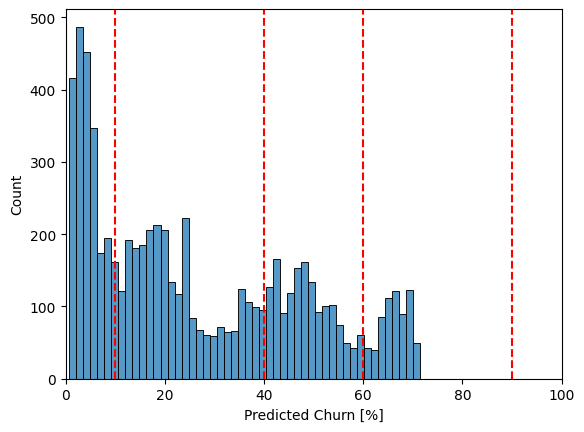

In [ ]:
# Histogram to show distribution of predicted churning probabilities
sns.histplot(predicted_churn['predicted_churn[%]'], bins=50)

# Vertical lines seperating buckets
plt.axvline(10, color='red', linestyle='--')
plt.axvline(40, color='red', linestyle='--')
plt.axvline(60, color='red', linestyle='--')
plt.axvline(90, color='red', linestyle='--',)

plt.xlim(0,100)

plt.xlabel('Predicted Churn [%]')
plt.ylabel('Count')

plt.show()

In [ ]:
def risk_buckets(df):
  '''
  This function buckets different risk percentages of churning into different levels of risk.
  '''
  dfoutput = df.copy()

  # Define bucket boundaries
  bucketval = [0, 10, 40, 60, 90, 100]

  # Define bucket names
  bucketlabel = ['Very Low Risk', 'Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']

  # New dataframe column to assign values to buckets
  dfoutput['risk_label'] = pd.cut(dfoutput['predicted_churn[%]'], bins=bucketval, labels=bucketlabel, right=False)

  return dfoutput

In [ ]:
# Apply bucket function to dataframe
predicted_churn = risk_buckets(predicted_churn)

In [ ]:
# Save dataframe as csv
predicted_churn.to_csv('predicted_churn.csv')

In [ ]:
# title
predicted_churn.head()

,predicted_churn_value,predicted_churn[%],risk_label
customerid,,,
3668-QPYBK,0.372599,37.259907,Low Risk
9237-HQITU,0.542874,54.287373,Medium Risk
9305-CDSKC,0.520716,52.071560,Medium Risk
7892-POOKP,0.265623,26.562347,Low Risk
0280-XJGEX,0.239110,23.911020,Low Risk


## Risk Simulation and Expected Loss

* A useful insight we decided to include was without interference, how many customers could we expect to churn.
* The following is a simulation in probabilistic churn assosicated with the probability of churning that was outputted from our model.
* This utilises _Monte Carlo Simulations_ to find a distribution of a percent of customers that could be lost to churn.
* **IMPORTANTLY** this is an assesment under the current conditions of the data and **ONLY FOR CURRENT CUSTOMERS**

In [ ]:
def expected_churn(df, simulation_num = 100000):
  '''
  This function runs a simulation on potential possibilites of customers churning at a particular probability.
  This will run as many times as the simulation_num, for numbers to order of 10^5 using google colab's gpu makes runtimes faster.
  '''
  probs = df['predicted_churn_value'].values
  num_customers = len(probs)

  # Create matrix (size simulation_num*num_customers) of random numbers [0,1)
  random_matrix = np.random.rand(simulation_num, num_customers)

  # Compare generated matrix to probability of churn, if lower, the customer churns
  churn_matrix = (random_matrix <= probs).astype(int)

  # Finds mean churn per simulation, giving distribution of possible churn
  churn_dist = churn_matrix.mean(axis=1)

  # Finds mean churn over all simulations
  expected_customer_churn = churn_dist.mean()

  # Calculate 99 percentile of distribution
  lower_bound99, upper_bound99 = np.percentile(churn_dist, [0.5, 99.5])

  return expected_customer_churn, churn_dist, lower_bound99, upper_bound99

In [ ]:
# Call expected_churn
# Returning average expected churn, distribution of potential churn and 99 percentiles
average_expected_churn, churn_distribution, lb99, ub99 = expected_churn(predicted_churn)

In [ ]:
print(f'Expected Churn [Decimal]: {average_expected_churn}\n')
print(f'Expected Churn [%]: {average_expected_churn*100}\n')
print(f'Realised Expected Churn: {average_expected_churn * len(predicted_churn)}\n')
print(f'99% Confidence Interval [Lower]: {lb99}\n')
print(f'99% Confidence Realised Churn [Lower]: {lb99 * len(predicted_churn)}\n')
print(f'99% Confidence Interval [Upper]: {ub99}\n')
print(f'99% Confidence Realised Churn [Upper]: {ub99 * len(predicted_churn)}\n')

Expected Churn [Decimal]: 0.26581619480335084

Expected Churn [%]: 26.581619480335085

Realised Expected Churn: 1872.14346

99% Confidence Interval [Lower]: 0.2538690898764731

99% Confidence Realised Churn [Lower]: 1788.0

99% Confidence Interval [Upper]: 0.2777225614084907

99% Confidence Realised Churn [Upper]: 1956.0000000000002



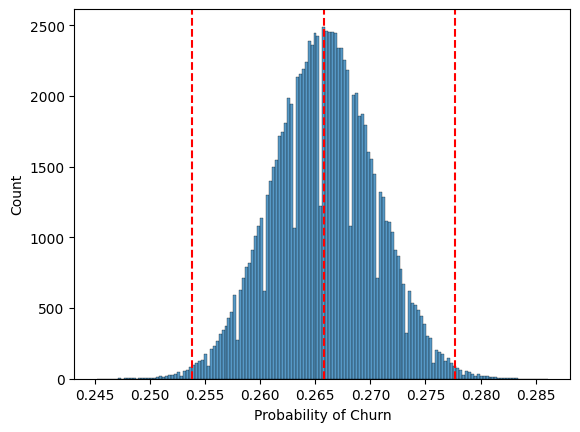

In [ ]:
# Histogram of average churn distribution
sns.histplot(churn_distribution)

# Vertical lines indicating 99% confidence intervals
plt.axvline(average_expected_churn, color='red', linestyle='--')
plt.axvline(lb99, color='red', linestyle='--')
plt.axvline(ub99, color='red', linestyle='--')

plt.xlabel('Probability of Churn')
plt.ylabel('Count')

plt.show()

### Simulation Results
* On average the expected churn of total customers would be ~26.5% of current customers.
* On average a realised expected churn corresponds to ~1870 (+/- ~83) customers at a 99% confidence.
* You would expect an uptake of ~1870 customers at some point to break even from current expected loss of customers.